## IMPORTANT NOTE FOR EXAMINER: This jupyter notebook was created using a tensorflow environment in anaconda. This did not run on the root environment as the root does not have tensorflow so i had to create a new environment since pip install tensorflow was not working.

In [43]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

from tensorflow import keras

In [2]:
# load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Understanding the shape of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Understanding the data types in the dataset
print(x_train.dtype)
print(y_train.dtype)
print(x_test.dtype)
print(y_test.dtype)

uint8
uint8
uint8
uint8


Note that our x variable contains 3 dimensional array that contains the length and width of the image. Our response/dependent variable is a one dimensional array consisting only of the labels. To proceed we must convert our independent variable into 2d or 1d array.

Secondly, note that the data type of all our variables is uint8. For machine learning models, it is best to convert the data type into integer or floats which helps with accuracy of the model predictions. In order to convert the categorical response variable into numeric/continuous data we need to encode the values.

In [5]:
# Encode the target  variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)

le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [7]:
print('The data type of our training response variable is',y_train.dtype)
print('The data type of our testing response variable is',y_test.dtype)

The data type of our training response variable is int64
The data type of our testing response variable is int64


In [8]:
x_train.shape[0]

60000

In [9]:
# Reshape the training and testing independent variable into a 2D array
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])


The purpose of splitting data into training, testing and validation subsets is to ensure that the model is accurate. The training set is used to build a model whilst the development (testing) is used to help evaluate the model in order to prune decision/regression trees and a final validation testing subset of the data is used to test the predictive power of the model.

In [10]:
# splitting our training data further to create training and development subsets of the data
x_train, x_dev,y_train, y_dev = train_test_split(x_train,y_train,train_size = 0.8,random_state = 42)
print(x_train.shape)
print(x_dev.shape)

(48000, 784)
(12000, 784)


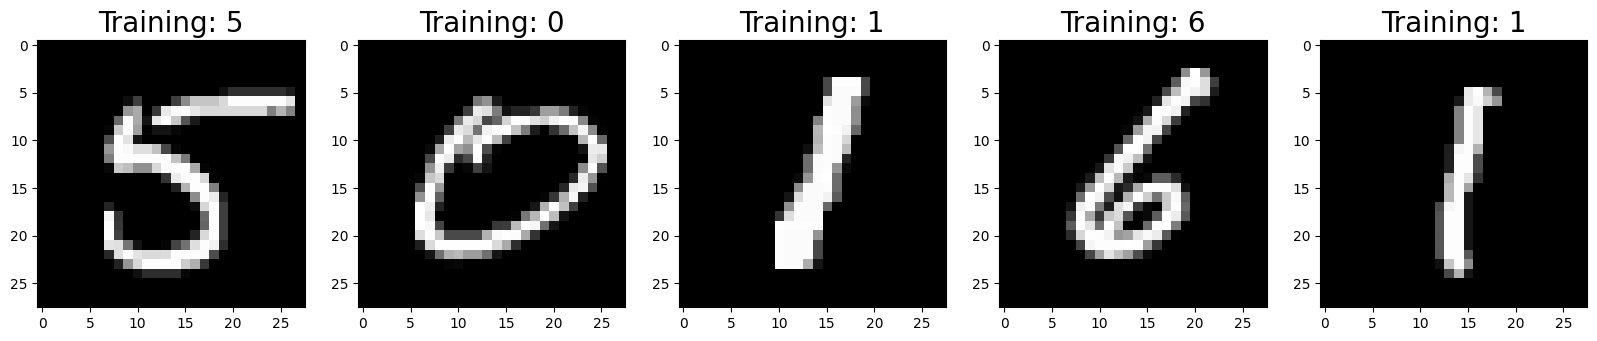

In [11]:
#Preview some images
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}', fontsize = 20)

In [12]:
# Random forest model for the mnist_dataset tested on the development dataset
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(x_train,y_train)
preds = forest.predict(x_dev)
print("Accuracy:", accuracy_score(y_dev,preds))

Accuracy: 0.96725


We will choose to fine tune the max_depth of the trees. This is because we know as the number of trees increases, the error rate will decrease so choosing a high value for this should suffice.

We will instead fine tune the number of branches in each tree to make the predictions more accurate and avoid overfitting

In [16]:
max_depth = [int(i) for i in np.linspace(start = 1, stop = 50, num = 10,endpoint = True)]
train_results = []
dev_results = []
for i in max_depth:
    rf = RandomForestClassifier(max_depth = i)
    rf.fit(x_train,y_train)
    score1 = rf.score(x_train,y_train)
    train_results.append(score1)
    score2 = rf.score(x_dev,y_dev)
    dev_results.append(score2)
    print('Max depth:', i)
    print('score:', score2)
    print('\n')

Max depth: 1
score: 0.5340833333333334


Max depth: 6
score: 0.8890833333333333


Max depth: 11
score: 0.9515


Max depth: 17
score: 0.96675


Max depth: 22
score: 0.9664166666666667


Max depth: 28
score: 0.9694166666666667


Max depth: 33
score: 0.9676666666666667


Max depth: 39
score: 0.9691666666666666


Max depth: 44
score: 0.9678333333333333


Max depth: 50
score: 0.967




Max_depth with the greatest accuracy is 44 so we use this value as our hyper parameter and rerun the model and then apply to the test data

In [37]:
# confusion matrix
preds = forest.predict(x_dev)
classes = list(set(y_train))
conf_mat = confusion_matrix(y_dev, preds)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)

In [38]:
cm_df

,0,1,2,3,4,5,6,7,8,9
0,1160,0,1,0,4,2,2,0,6,0
1,0,1307,7,3,2,0,1,1,0,1
2,2,6,1140,4,3,0,3,8,7,1
3,3,0,17,1159,0,14,1,7,11,7
4,2,0,1,0,1143,0,4,5,0,21
5,6,4,2,11,2,1058,6,1,9,5
6,5,0,1,0,4,6,1157,0,4,0
7,1,11,16,2,8,0,0,1247,4,10
8,1,4,6,8,9,10,4,1,1114,3
9,6,2,4,8,17,6,2,14,5,1130


According to the confusion matrix, the model struggles with predicting 5,8 and 9 the most as there is not a single zero in those rows

In [39]:
# rerun models with these parameters
forest = RandomForestClassifier(n_estimators=100,max_depth = 44, random_state = 7)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)
print(f"The score on testing data with optimisted hyper-parameters is {forest.score(x_test,y_test)}.")

The score on testing data with optimisted hyper-parameters is 0.9677.


In [44]:
# Evaluation metrics
f1_score_f = f1_score(y_test,y_pred, average='micro')
precision_score_f = precision_score(y_test,y_pred, average='micro')
recall_score_f = recall_score(y_test,y_pred, average='micro')

In [46]:
print(f'''f1_score: {f1_score_f} \nprecision_score: {precision_score_f} \nrecall_score:{recall_score_f}''')

f1_score: 0.9677 
precision_score: 0.9677 
recall_score:0.9677
